In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from davood_ml_functions import *

from davood_ml_functions import *
from warnings import filterwarnings
filterwarnings("ignore")

In [25]:
# read original data
df = pd.read_csv(r"C:\Users\Davood\Desktop\Bootcamp\DivarEstate\Divar.csv")

In [26]:
# categories
for_sale = ["residential-sell" , "commercial-sell"]
for_rent = ["residential-rent" , "commercial-rent" , "temporary-rent"]

rent_related = ["rent_value" , "rent_type" , "rent_credit_transform" , "credit_value" ,
                "transformable_credit" , "transformed_credit" , "transformable_rent" , "transformed_rent"]
price_related = ["price_value" , "transformable_price"]

In [27]:
# The Y vector
df["for_sale"] = df["cat2_slug"].isin(for_sale)
df["Y"] = np.where(df["for_sale"] == True , df["price_value"] , df["transformable_credit"])
df = df.drop(price_related , axis = 1)
df = df.drop(rent_related , axis = 1)
df["Y"] = df["Y"].astype(float)
df = df.dropna(subset = ["Y"])

In [28]:
columns = ["land_size" , "building_size" , "regular_person_capacity" ,
           "rooms_count" , "location_latitude" , "location_longitude" ,"Y"]

df = df.loc[: , columns]

In [29]:
get_table_null_dtype(df)

,null_percentage,dtype
column_name,,
regular_person_capacity,100.00,float64
land_size,79.74,float64
location_latitude,34.04,float64
location_longitude,34.04,float64
rooms_count,12.02,object
building_size,0.00,float64
Y,0.00,float64


In [30]:
df = df.drop("regular_person_capacity" , axis = 1)

In [31]:
df["rooms_count"] = df["rooms_count"].replace({"دو" : 2 , "یک" : 1 , "سه" : 3 , 
                           "بدون اتاق" : 0 , "چهار" : 4 , "پنج یا بیشتر" : 5})

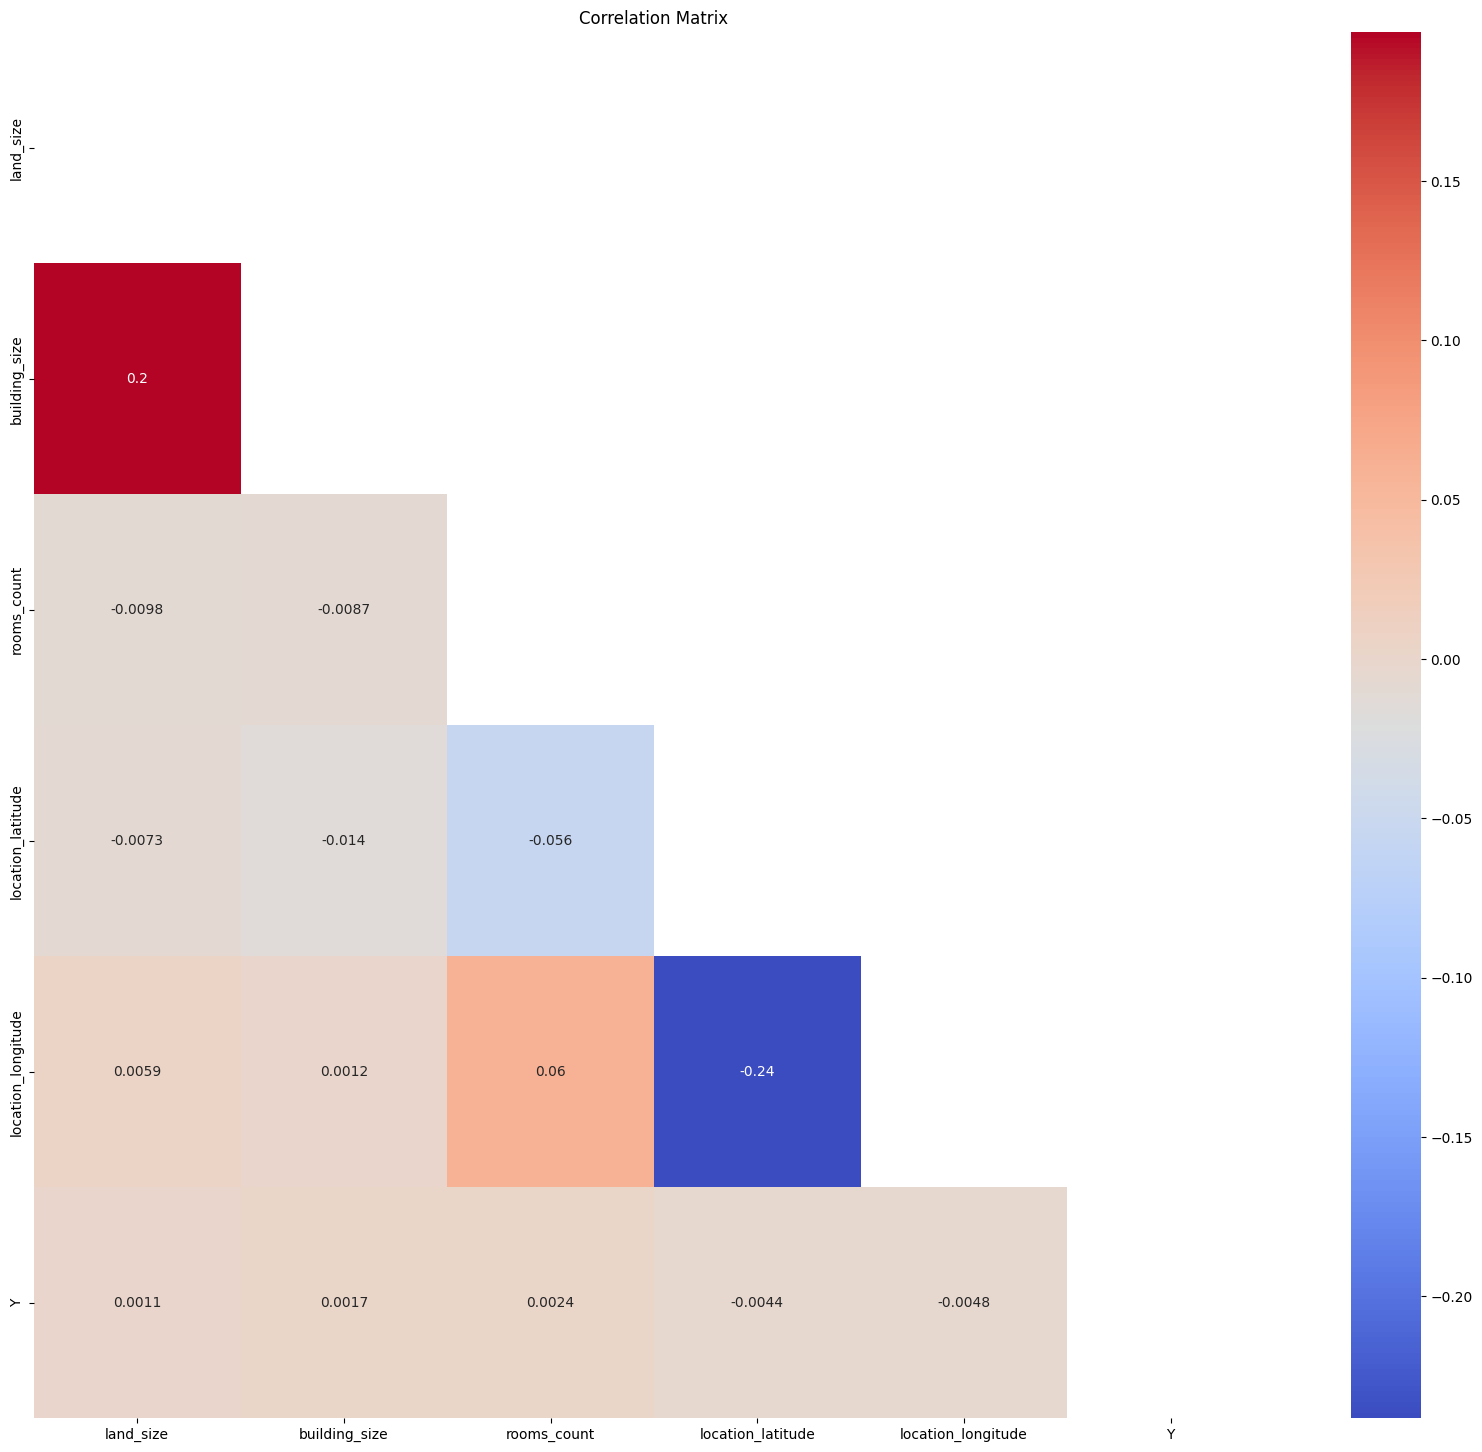

In [32]:
get_corrolation_heatmap(df , dpi = 200 , save = True)